# Classification with sklearn's modelers
1. Decision Tree
2. Artificial Neural Network
3. Random Forest

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 1) Import Library
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2) read data
iris_dataset = load_iris()

print(iris_dataset.feature_names)
print(iris_dataset.data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


In [2]:
# Set the attributes to be features and the target
#
XX = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
yy = pd.DataFrame(iris_dataset.target)

In [8]:
yy

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [3]:
# 3) Preprocessing       

# 3.1) Split data -> train / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=0)

print(X_train.shape )                    
print(X_test.shape )
print(y_train.shape )                    
print(y_test.shape )

(105, 4)
(45, 4)
(105, 1)
(45, 1)


In [4]:
# 3.2) Standardize data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

## Perform Classification using Commonly Used Classifiers

### 1) Decision Tree Classifier

In [5]:
# ############ Decision Tree ###############             

# 4) initialize Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion="entropy")
#
# criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
# Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# 5) Train model
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy')

accuracy DT train: 1.000
accuracy DT test : 0.978


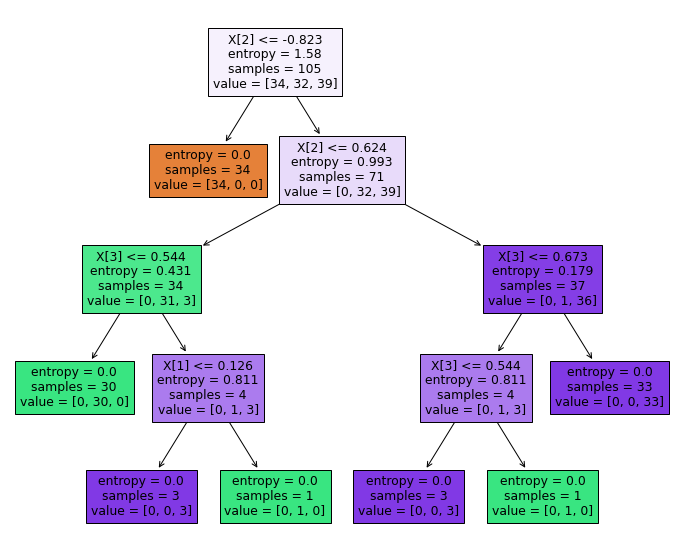

In [6]:
# 6) predict
y_predict = dt.predict(X_test_std)

# Accuracy
# print("training accuracy: ", dt.score(X_train_std,y_train)) 
# print("testing accuracy: ", dt.score(X_test_std,y_test))         

print("accuracy DT train: {:.3f}".format(dt.score(X_train_std, y_train)))
print("accuracy DT test : {:.3f}".format(dt.score(X_test_std, y_test)))

plt.figure(figsize=(12, 10))
plot_tree(dt, filled=True)
plt.show()

### 2) Neural Network Classifier

In [7]:
####################### NN - MLP #########################
#  4) Initialize NN
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=0)

# 5) train
mlp.fit(X_train_std, y_train)

# 6) predict
y_predict = mlp.predict(X_test_std)
print("accuracy MLP train :{:.3f}".format(mlp.score(X_train_std, y_train)))
print("accuracy MLP test  :{:.3f}".format(mlp.score(X_test_std, y_test)))

from sklearn.metrics import confusion_matrix
print("Confusion_matrix for X_train\n", confusion_matrix(y_train, mlp.predict(X_train_std)))
print("Confusion_matrix for X_test\n",  confusion_matrix(y_test, mlp.predict(X_test_std)))

accuracy MLP train :1.000
accuracy MLP test  :0.978
Confusion_matrix for X_train
 [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
Confusion_matrix for X_test
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### 3) Random Forest Classifier

In [8]:
######################   RFC  #########################
#  4) Initialize RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15, max_depth=None,
    min_samples_split=2, random_state=0)

# 5) train
rfc.fit(X_train_std, y_train)

# 6) predict
y_predict = rfc.predict(X_test_std)
print("accuracy Random Forest train :{:.3f}".format(rfc.score(X_train_std, y_train)))
print("accuracy Random Forest test  :{:.3f}".format(rfc.score(X_test_std, y_test)))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, rfc.predict(X_train_std)))
print(confusion_matrix(y_test, rfc.predict(X_test_std)))

accuracy Random Forest train :0.990
accuracy Random Forest test  :0.978
[[34  0  0]
 [ 0 32  0]
 [ 0  1 38]]
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### ROC plot with roc_curve() function

Unfortunately roc_curve() works with only binary class classification.
For multiclass, please see.... https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(y_test, y_predict)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

ValueError: multiclass format is not supported

### Further studies:
1. Other interesting classification techniques can be studied from https://www.kaggle.com/coolman/different-classification-techniques-python
2. Classification of Personal Loan is at https://www.kaggle.com/kiransalavandi/banking-loan-modelling-classification.
3. Classification of credit card fraudulence is at https://www.kaggle.com/mlg-ulb/creditcardfraud/kernels
